# Exercise 1

Using Bayes theorem we get: <br>
$\pi_{X|Y}=\frac{\pi_{Y|X} \pi_{X}}{\pi_{Y}}\propto\pi_{Y|X}\pi_X$. <br>
$Y|X=x\sim N(x^4+x^2,1), \ X\sim N(0,2)$ and the product of two gaussians is still a gaussian with density the product of the densities, therefore: <br>
$\pi_{X|Y=y}(x)=\frac{1}{4 \pi}\exp(-\frac{1}{2}((y-x^4-x^2)^2+(x)^2/16))$

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [17]:
#We first plot the posterior density:
def posterior_density(x,y):
    return 1/(2*np.sqrt(2)*np.pi)*np.exp(-(1/2)*((y-x**4-x**2)**2+(x**2)/4))

Text(0.5, 1.0, 'Posterior density given $Y=4$')

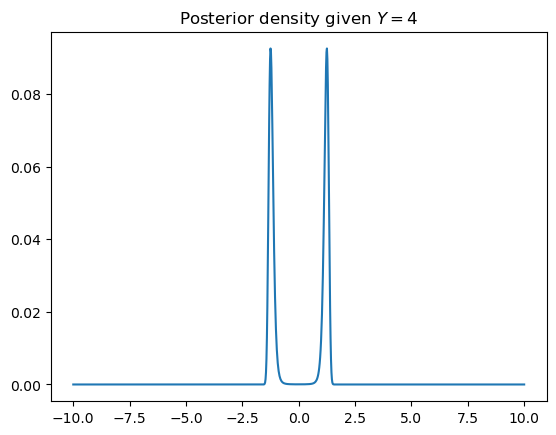

In [18]:
x=np.linspace(-10,10,1000)
posterior_dens=posterior_density(x,4)
plt.plot(x,posterior_dens)
plt.title("Posterior density given $Y=4$")

In [133]:
def posterior_grad(x,y=4):
    res=posterior_density(x,4)*(-(1/2)*(2*(4-x**4-x**2)*(-4*x**3-2*x)+x/2))
    return res

To find the MAP we minimise, through GD, $-\pi_{X|Y}$.

In [134]:
def GD(x0,alpha=1,TOL=1e-6, Nitmax=500):
    x=x0
    for n in range(Nitmax):
        g=posterior_grad(x)
        if(n>0): 
            alpha=alpha/2
        x=x+alpha*g
        if (np.linalg.norm(alpha * g) < TOL): 
            break
    return x

In [135]:
MAP=GD(1)

In [136]:
MAP

1.2458325058963715

The Laplace approximation of the posterior density is: $\tilde{\pi}=N(MAP,1/V"(MAP))$, where in this case<br>
$V(x)=\frac{1}{2} \left((4-x^4-x^2)^2+x^2/4 \right)$ and $V"(x)=\frac{1}{2}\left(2(4-x^4-x^2)(-12x^2-2)+2(-4x^3-2x)^2+1/2\right)$.

In [166]:
def gV(x):
    return (4-x**4-x**2)*(-4*(x**3)-2*x)+x/4
def V2(x):
    return ((4-x**4-x**2)*(-12*x**2-2)+(-4*x**3-2*x)**2+1/4)

In [157]:
lapl_var=1/V2(MAP)
lapl_var

0.00961309585130797

Then $\tilde{\pi}=N(1.25,0.0096)$.

Text(0.5, 1.0, 'Laplace approximation of the posterior density vs prior')

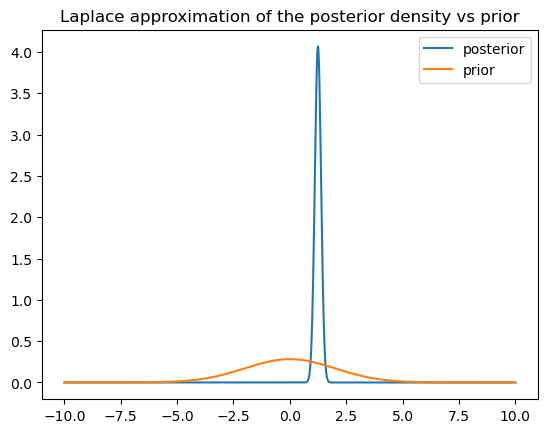

In [158]:
x=np.linspace(-10,10,1000)
laplace_approx=(1/(np.sqrt(2*np.pi*lapl_var)))*np.exp(-(1/2)*((x-MAP)**2)/(2*lapl_var))
prior=(1/(np.sqrt(4*np.pi)))*np.exp(-(1/2)*((x**2)/(4)))
plt.plot(x,laplace_approx,label="posterior")
plt.plot(x,prior,label="prior")
plt.legend(loc='best')
plt.title("Laplace approximation of the posterior density vs prior")


Langevin method: <br>
$x_{n+1}=-\nabla V(x_n)\Delta t + \sqrt{2 \Delta t}\xi_n$, where $\xi_n\sim N(0,1)$.

In [175]:
delta_t=0.01
x_0=1.0
M=int(1e4)
N=int(100/delta_t)+1 #we need M simulations up to time 10
simulations2=np.zeros((N,M)) #each column contains one simulation
simulations2[0,:]=x_0
#simulating:
for m in range(M):
    for n in range(1,N):
        simulations2[n,m]=-gV(simulations2[n-1,m])*delta_t+np.sqrt(2*delta_t)*np.random.normal(0,1)
        simulations2[n,m]+=simulations2[n-1,m]

C:\Users\asus\AppData\Local\Temp\ipykernel_10548\3347813877.py:2: RuntimeWarning: overflow encountered in scalar power
  return (4-x**4-x**2)*(-4*(x**3)-2*x)+x/4
C:\Users\asus\AppData\Local\Temp\ipykernel_10548\3315058295.py:11: RuntimeWarning: invalid value encountered in scalar add
  simulations2[n,m]+=simulations2[n-1,m]
C:\Users\asus\AppData\Local\Temp\ipykernel_10548\3347813877.py:2: RuntimeWarning: overflow encountered in scalar multiply
  return (4-x**4-x**2)*(-4*(x**3)-2*x)+x/4


In [177]:
M=int(1e4)
N=int(10/delta_t)+1 #we need M simulations up to time 10
simulations3=np.zeros((N,M)) #each column contains one simulation
simulations3[0,:]=x_0
#simulating:
for m in range(M):
    for n in range(1,N):
        simulations3[n,m]=-gV(simulations3[n-1,m])*delta_t+np.sqrt(2*delta_t)*np.random.normal(0,1)
        simulations3[n,m]+=simulations3[n-1,m]

C:\Users\asus\AppData\Local\Temp\ipykernel_10548\3347813877.py:2: RuntimeWarning: overflow encountered in scalar power
  return (4-x**4-x**2)*(-4*(x**3)-2*x)+x/4
C:\Users\asus\AppData\Local\Temp\ipykernel_10548\2239621214.py:9: RuntimeWarning: invalid value encountered in scalar add
  simulations3[n,m]+=simulations3[n-1,m]
C:\Users\asus\AppData\Local\Temp\ipykernel_10548\3347813877.py:2: RuntimeWarning: overflow encountered in scalar multiply
  return (4-x**4-x**2)*(-4*(x**3)-2*x)+x/4


Text(0.5, 1.0, 'Laplace approximation of the posterior density given $y=4$')

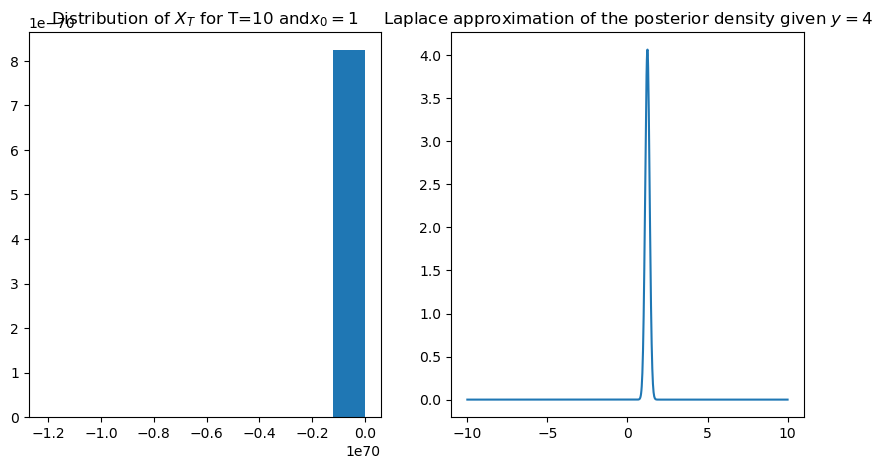

In [179]:
fig, ax=plt.subplots(1,2, figsize=(10,5))
ax[0].hist(simulations3[-1], density=True);
ax[0].set_title("Distribution of $X_T$ for T=10 and$x_0=1$")
ax[1].plot(x,laplace_approx)
ax[1].set_title("Laplace approximation of the posterior density given $y=4$")

Text(0.5, 1.0, 'Laplace approximation of the posterior density given $y=4$')

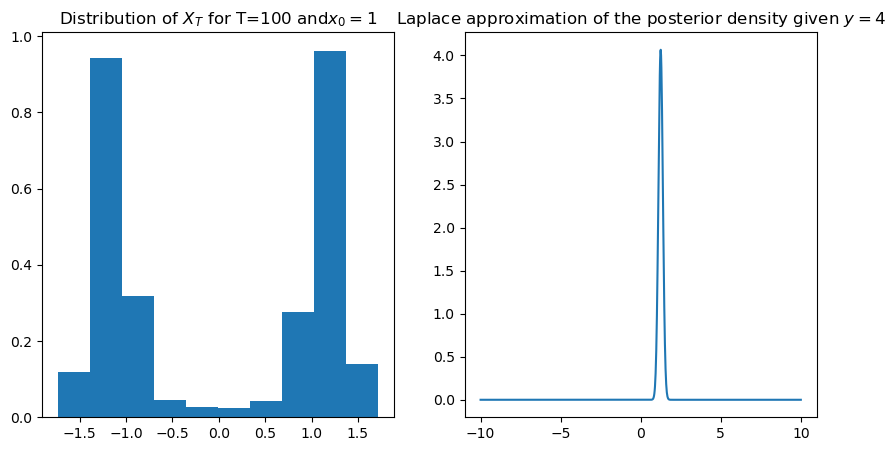

In [176]:
fig, ax=plt.subplots(1,2, figsize=(10,5))
ax[0].hist(simulations2[-1], density=True);
ax[0].set_title("Distribution of $X_T$ for T=100 and$x_0=1$")
ax[1].plot(x,laplace_approx)
ax[1].set_title("Laplace approximation of the posterior density given $y=4$")

Text(0.5, 1.0, 'Laplace approximation of the posterior density given $y=4$')

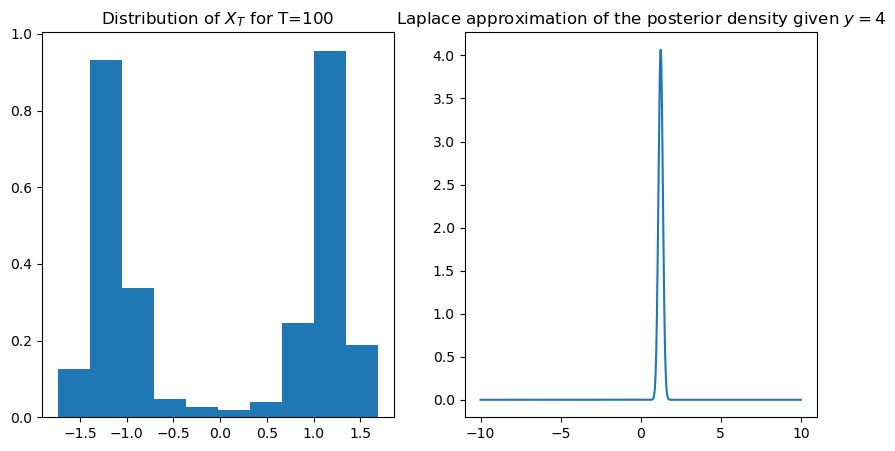

In [174]:
fig, ax=plt.subplots(1,2, figsize=(10,5))
ax[0].hist(simulations2[-1], density=True);
ax[0].set_title("Distribution of $X_T$ for T=100 and$x_0=0.5$")
ax[1].plot(x,laplace_approx)
ax[1].set_title("Laplace approximation of the posterior density given $y=4$")